Đây là thuật toán phân cụm đơn giản, nhanh, và được dùng khắp nơi — từ marketing, sinh học, đến nén ảnh.

Mình sẽ trình bày theo đúng phong cách bạn yêu thích:

🔹 1. Nguyên lý hoạt động (không công thức nặng!)
🎯 Mục tiêu:
Chia dữ liệu thành K nhóm (cụm) sao cho:

Các điểm trong cùng nhóm thì "gần nhau",
các điểm ở nhóm khác thì "xa nhau". 

🧠 Ý tưởng chính — “Gom những điểm gần nhau lại!”
Bạn chọn số cụm K (ví dụ: K=3 → chia thành 3 nhóm).
Thuật toán:
Khởi tạo ngẫu nhiên K "tâm cụm" (centroids).
Gán mỗi điểm vào cụm có tâm gần nhất.
Di chuyển tâm cụm đến trung tâm của các điểm trong cụm.
Lặp lại bước 2–3 đến khi tâm cụm không đổi nữa.
→ Quá trình này tự động hội tụ về một cách chia "ổn định".

💡 Ví dụ trực quan:
Dữ liệu: vị trí nhà khách hàng trên bản đồ.
K=3 → K-Means tìm ra 3 trung tâm, và gom khách hàng thành 3 khu vực.
Doanh nghiệp có thể mở 3 cửa hàng tại 3 tâm cụm đó!
✅ Ưu điểm:
Rất nhanh, dễ cài đặt.
Hiệu quả với cụm hình cầu, kích thước đều.
Ít tham số (chỉ cần chọn K).
❌ Hạn chế:
Phải chọn K trước (không tự động phát hiện số cụm).
Không xử lý tốt cụm hình dạng bất thường (trăng lưỡi liềm, vòng tròn...).
Nhạy cảm với điểm ngoại lai (outliers).
Khởi tạo ngẫu nhiên → có thể ra kết quả khác nhau.

🔹 3. Khi nào dùng K-Means?
Dữ liệu có
cụm hình cầu, kích thước đều
Cụm có
hình dạng phức tạp
(trăng lưỡi liềm, vòng tròn) → dùng
DBSCAN
Bạn
biết trước số cụm K
(hoặc có thể thử nhiều K)
Không biết K, và
K có thể thay đổi
→ dùng
hierarchical clustering
Cần
phân cụm nhanh trên dữ liệu lớn
Dữ liệu có
nhiều ngoại lai
→ K-Means bị lệch tâm
Làm
tiền xử lý
(giảm dữ liệu, khởi tạo cho mô hình khác)
Đặc trưng
chưa chuẩn hóa
→
bắt buộc phải chuẩn hóa trước!

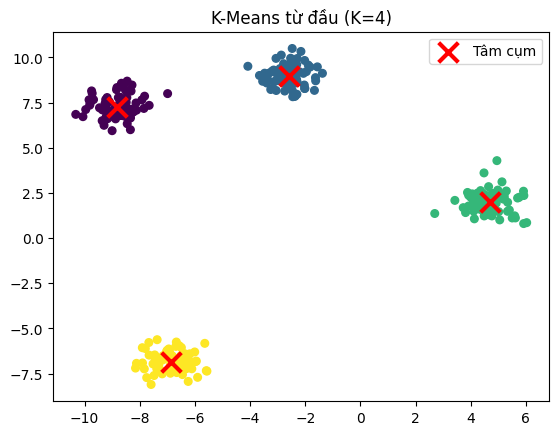

✅ Hoàn thành! K-Means tự code đã chạy.
🔍 Sklearn cũng tìm được 4 cụm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleKMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def fit(self, X):
        n_samples, n_features = X.shape
        
        # 1. Khởi tạo ngẫu nhiên K tâm cụm
        self.centroids = np.random.uniform(
            low=X.min(axis=0), 
            high=X.max(axis=0), 
            size=(self.k, n_features)
        )
        
        for _ in range(self.max_iters):
            # 2. Gán mỗi điểm vào cụm gần nhất
            clusters = [[] for _ in range(self.k)]
            for idx, point in enumerate(X):
                distances = [self._euclidean_distance(point, centroid) for centroid in self.centroids]
                closest_cluster = np.argmin(distances)
                clusters[closest_cluster].append(idx)
            
            # Lưu bản sao cũ để kiểm tra hội tụ
            old_centroids = self.centroids.copy()
            
            # 3. Cập nhật tâm cụm = trung bình các điểm trong cụm
            for cluster_idx, cluster in enumerate(clusters):
                if len(cluster) == 0:
                    # Nếu cụm rỗng, giữ nguyên tâm
                    continue
                self.centroids[cluster_idx] = np.mean(X[cluster], axis=0)
            
            # 4. Kiểm tra hội tụ
            if np.allclose(old_centroids, self.centroids):
                break
        
        # Lưu nhãn cụm cho từng điểm
        self.labels = np.zeros(n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                self.labels[idx] = cluster_idx

    def predict(self, X):
        """Dự đoán cụm cho dữ liệu mới"""
        labels = []
        for point in X:
            distances = [self._euclidean_distance(point, centroid) for centroid in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

# --- Thử nghiệm ---
from sklearn.datasets import make_blobs

# Tạo dữ liệu 2D với 4 cụm rõ ràng
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Huấn luyện K-Means tự code
kmeans = SimpleKMeans(k=4, max_iters=100)
kmeans.fit(X)

# Vẽ kết quả
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', s=30)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Tâm cụm')
plt.title("K-Means từ đầu (K=4)")
plt.legend()
plt.show()

# So sánh với sklearn
from sklearn.cluster import KMeans
sk_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
sk_labels = sk_kmeans.fit_predict(X)

print("✅ Hoàn thành! K-Means tự code đã chạy.")
print(f"🔍 Sklearn cũng tìm được {len(np.unique(sk_labels))} cụm.")